#**Anomaly Detection and Time Series Assignment**

Question 1: What is Anomaly Detection? Explain its types (point, contextual, and
collective anomalies) with examples.

Ans1. Anomaly Detection refers to the process of identifying data points, events, or patterns that deviate significantly from expected behavior in a dataset. These deviations — called anomalies or outliers — often signal important, unusual, or even problematic situations such as fraud, system faults, or cyber-attacks.

A point anomaly (also called a global anomaly) is a single data point that deviates significantly from the rest of the dataset. These are the simplest and most widely studied type.

Example:

In credit card transactions, if a user normally spends ₹500–₹2,000 per purchase and suddenly there’s a ₹50,000 transaction, that individual transaction is a point anomaly and may be flagged as suspicious.

A contextual anomaly looks normal in general, but is unusual within a specific context (like time, season, or location). These require understanding the context to decide whether a value is anomalous.

Example:

A temperature of 30°C might be normal in summer, but the same value in winter would be anomalous given the context of the season.

A collective anomaly occurs when a group of related data points deviates from expected behavior, even though each point may seem normal on its own. It’s the pattern in the group that’s unusual.

Example:

In network traffic logs, individual requests might look normal, but a sudden group of many requests from different IP addresses in a short time could indicate a coordinated attack (like a DDoS attack).

Question 2: Compare Isolation Forest, DBSCAN, and Local Outlier Factor in terms of
their approach and suitable use cases.

Ans2.
1. Isolation Forest
• Uses random trees to isolate points that are few and different.
• Works well on large or high-dimensional data and is fast.
• Best for detecting global outliers.

2. DBSCAN
• Clusters data based on density and labels points not in dense clusters as noise (outliers).
• Good when you want clusters + outlier detection and for spatial/shape-based data.
• Sensitive to parameters and struggles when densities vary.

3. Local Outlier Factor (LOF)
• Measures local density; points much less dense than neighbors are outliers.
• Produces a score and finds local anomalies even in varying densities.
• Slower on large data.

Question 3: What are the key components of a Time Series? Explain each with one
example.

Ans3. Trend – Long-term upward/downward movement.
Example: Yearly sales steadily increasing over years.

Seasonal – Regular, repeating pattern at fixed intervals.
Example: Ice-cream sales rise every summer.

Cyclical – Up and down movement over longer, irregular periods.
Example: Business cycle expansions and recessions.

Irregular/Random – Unpredictable fluctuations.
Example: Sudden drop in traffic due to a natural disaster.

Question 4: Define Stationary in time series. How can you test and transform a
non-stationary series into a stationary one?

Ans4. A time series is stationary if its mean, variance, and other statistical properties stay constant over time (don’t change with time).

 How to Test

ADF test: checks for a unit root; if p-value is small, series is likely stationary.

KPSS test: tests if series is stationary; if p-value is small, it is non-stationary.

 How to Transform Non-Stationary to Stationary

Differencing: subtract each value from the previous to remove trends.

Log transformation: stabilizes changing variance.

Seasonal differencing: remove repeating seasonal pattern.

Question 5: Differentiate between AR, MA, ARIMA, SARIMA, and SARIMAX models in
terms of structure and application.

Ans5. AR (Autoregressive)

• Uses past values of the series to predict current values.
• Best when current value depends mainly on its own history.
Example: AR(1) uses 1 lag.

 MA (Moving Average)

• Models current value based on past error terms (shocks).
• Captures short-term noise effects.

 ARIMA (AutoRegressive Integrated Moving Average)

• Combines AR + differencing (I) to make series stationary + MA.
• Used for non-seasonal time series with trends.

 SARIMA (Seasonal ARIMA)

• ARIMA + seasonal terms for patterns repeating at regular intervals (e.g., monthly, yearly).
• Best when data has seasonality.

SARIMAX

• SARIMA with Exogenous variables (X) — includes external predictors beyond the series itself.
• Useful when outside factors affect the series.



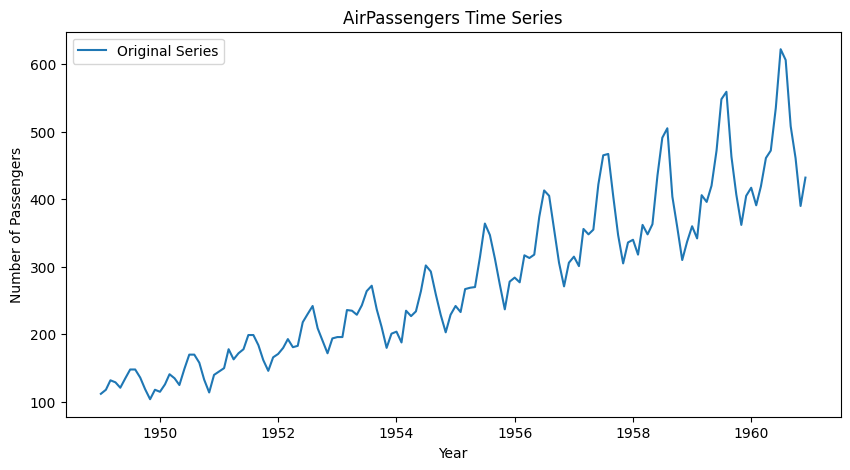

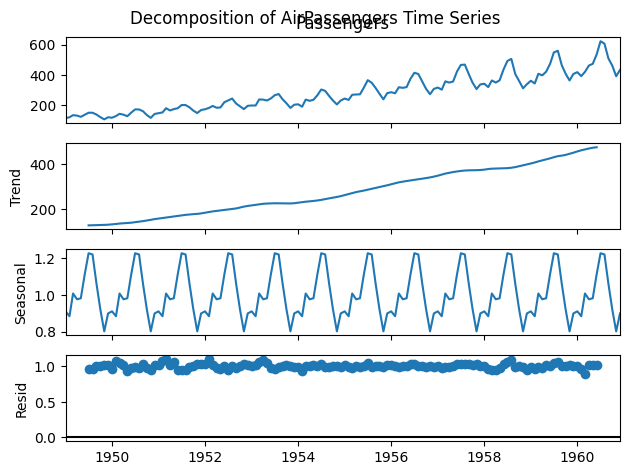

In [4]:
#Question 6: Load a time series dataset (e.g., AirPassengers), plot the original series, and decompose it into trend, seasonality, and residual components.
#Ans6.
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Load the AirPassengers dataset from a reliable CSV source
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv"
data = pd.read_csv(url, parse_dates=['Month'], index_col='Month')

# Plot the original time series
plt.figure(figsize=(10, 5))
plt.plot(data['Passengers'], label='Original Series')
plt.title('AirPassengers Time Series')
plt.xlabel('Year')
plt.ylabel('Number of Passengers')
plt.legend()
plt.show()

# Decompose into trend, seasonal, and residual components
decomposition = seasonal_decompose(data['Passengers'], model='multiplicative', period=12)

# Plot the decomposed components
fig = decomposition.plot()
fig.suptitle('Decomposition of AirPassengers Time Series')
plt.show()


In [11]:
#Question 7: Apply Isolation Forest on a numerical dataset (e.g., NYC Taxi Fare) to detect anomalies. Visualize the anomalies on a 2D scatter plot.
#Ans7.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import IsolationForest

# 1) Download a small NYC taxi fare sample from Hugging Face
url = "https://huggingface.co/datasets/JosephFeig/NYC-Taxi/resolve/main/train.csv"
print("Downloading data... (this may take a moment)")
data = pd.read_csv(url)

# Preview and clean up
print("Initial shape:", data.shape)
# Drop rows with missing coords or fare
data = data.dropna(subset=['pickup_longitude', 'pickup_latitude', 'fare_amount'])
print("After dropna:", data.shape)

# 2) Filter to valid coordinate ranges roughly within NYC bounds
data = data[
    (data['pickup_longitude'].between(-75, -73)) &
    (data['pickup_latitude'].between(40, 42))
].reset_index(drop=True)
print("After geo filter:", data.shape)

# 3) Select features for anomaly detection
X = data[['pickup_longitude', 'pickup_latitude', 'fare_amount']]

# Fit Isolation Forest
iso = IsolationForest(
    n_estimators=100,
    contamination=0.02,
    random_state=42
)
data['anomaly'] = iso.fit_predict(X)
# Convert to 0/1: 1 = anomaly, 0 = normal
data['anomaly'] = np.where(data['anomaly'] == -1, 1, 0)

# 4) Scatter plot: Longitude vs Latitude with anomalies colored
normal = data[data['anomaly'] == 0]
anomalies = data[data['anomaly'] == 1]

plt.figure(figsize=(10, 6))
plt.scatter(normal['pickup_longitude'], normal['pickup_latitude'],
            s=8, alpha=0.4, label='Normal')
plt.scatter(anomalies['pickup_longitude'], anomalies['pickup_latitude'],
            color='red', s=20, label='Anomaly')

plt.title("Isolation Forest Anomaly Detection: NYC Taxi Fare Pickups")
plt.xlabel("Pickup Longitude")
plt.ylabel("Pickup Latitude")
plt.legend()
plt.show()


KeyboardInterrupt: 

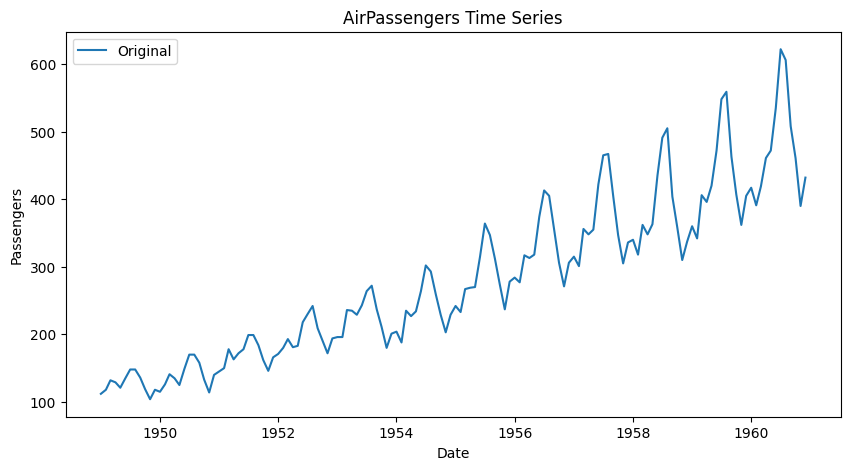

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


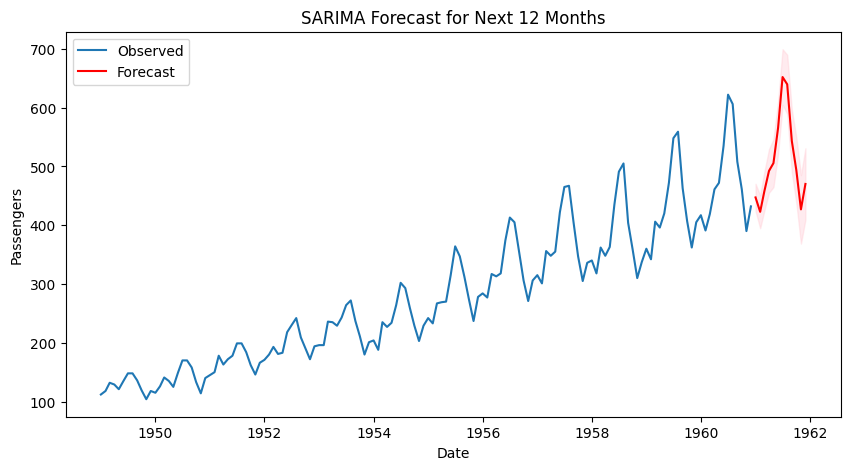

In [12]:
#Question 8: Train a SARIMA model on the monthly airline passengers dataset. Forecast the next 12 months and visualize the results.
#Ans8.
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX

# 1) Load AirPassengers dataset from GitHub
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv"
data = pd.read_csv(url, parse_dates=['Month'], index_col='Month')
data = data.rename(columns={'Passengers':'value'})  # standardize column

# 2) Plot original time series
plt.figure(figsize=(10,5))
plt.plot(data.index, data['value'], label='Original')
plt.title("AirPassengers Time Series")
plt.xlabel("Date")
plt.ylabel("Passengers")
plt.legend()
plt.show()

# 3) Train SARIMA Model
# Using seasonal_order for monthly seasonality (12 months)
model = SARIMAX(
    data['value'],
    order=(1, 1, 1),
    seasonal_order=(1, 1, 1, 12),
    enforce_stationarity=False,
    enforce_invertibility=False
)

results = model.fit(disp=False)

# 4) Forecast the next 12 months
forecast = results.get_forecast(steps=12)
forecast_values = forecast.predicted_mean
conf_int = forecast.conf_int()

# 5) Plot forecast with confidence interval
plt.figure(figsize=(10,5))
plt.plot(data.index, data['value'], label='Observed')
plt.plot(forecast_values.index, forecast_values, color='red', label='Forecast')
plt.fill_between(conf_int.index,
                 conf_int.iloc[:,0],
                 conf_int.iloc[:,1],
                 color='pink', alpha=0.3)
plt.title("SARIMA Forecast for Next 12 Months")
plt.xlabel("Date")
plt.ylabel("Passengers")
plt.legend()
plt.show()


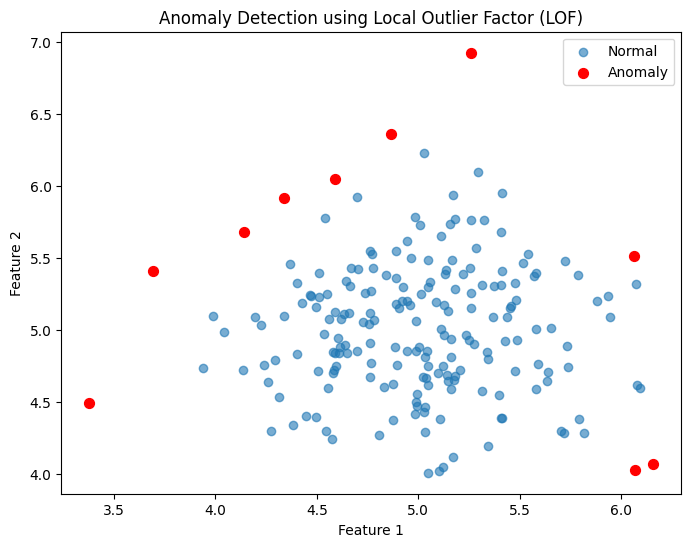

In [13]:
#Question 9: Apply Local Outlier Factor (LOF) on any numerical dataset to detect anomalies and visualize them using matplotlib.
#Ans9.
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import LocalOutlierFactor
from sklearn.datasets import make_blobs

# 1) Generate synthetic 2D data
# We create one cluster of 200 points
X, _ = make_blobs(n_samples=200, centers=[[5, 5]], cluster_std=0.5, random_state=42)

# 2) Fit Local Outlier Factor
# contamination is the fraction of data expected to be outliers
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.05)
y_pred = lof.fit_predict(X)

# 3) Identify anomalies
# LOF labels: 1 = normal, -1 = outlier
normal_data = X[y_pred == 1]
anomaly_data = X[y_pred == -1]

# 4) Visualize
plt.figure(figsize=(8, 6))
plt.scatter(normal_data[:, 0], normal_data[:, 1], label='Normal', alpha=0.6)
plt.scatter(anomaly_data[:, 0], anomaly_data[:, 1], color='red', label='Anomaly', s=50)
plt.title("Anomaly Detection using Local Outlier Factor (LOF)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()


/tmp/ipython-input-2873764370.py:18: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  date_rng = pd.date_range(start='2023-01-01', end='2023-12-31 23:45:00', freq='15T')


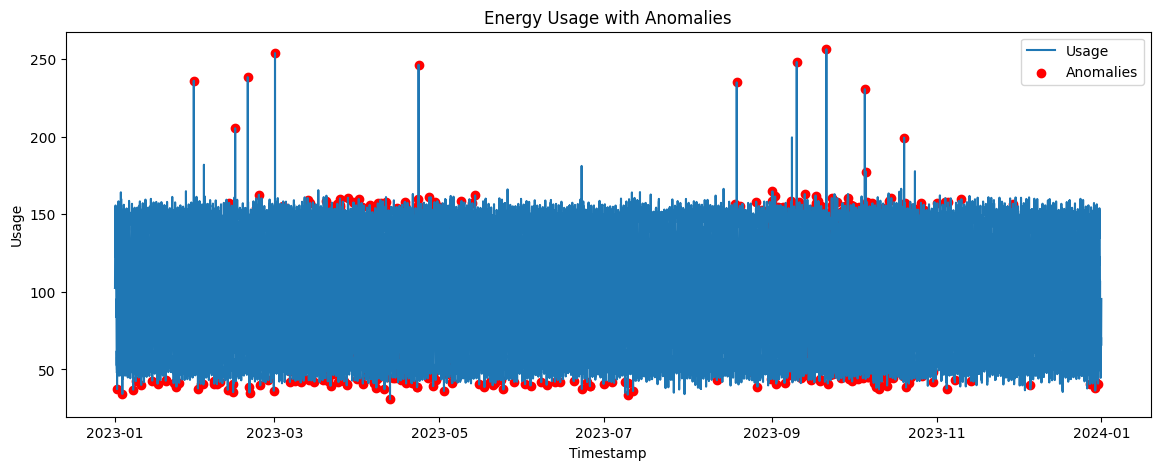

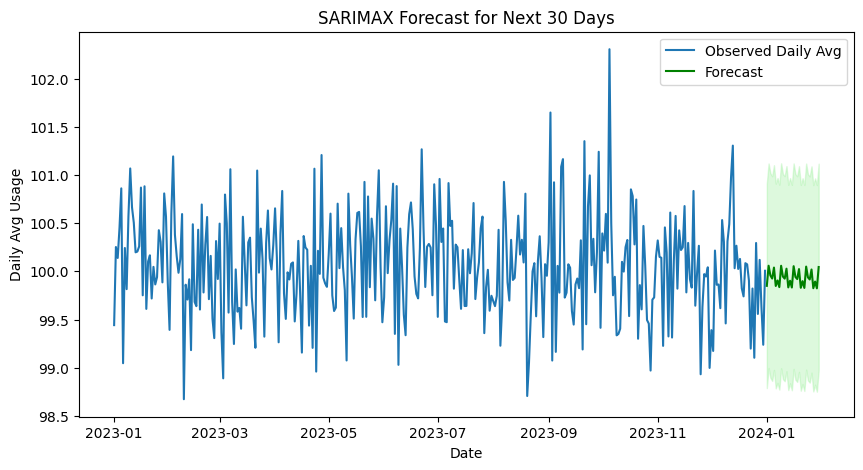

In [14]:
#Question 10: You are working as a data scientist for a power grid monitoring company. Your goal is to forecast energy demand and also detect abnormal spikes or drops in real-time consumption data collected every 15 minutes. The dataset includes features like timestamp, region, weather conditions, and energy usage.
#Explain your real-time data science workflow:
# ● How would you detect anomalies in this streaming data (Isolation Forest / LOF / DBSCAN)?
#● Which time series model would you use for short-term forecasting (ARIMA /SARIMA / SARIMAX)?
#● How would you validate and monitor the performance over time?
#● How would this solution help business decisions or operations?
#Ans10.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
from statsmodels.tsa.statespace.sarimax import SARIMAX

# ----------------------
# 1) Create synthetic dataset
np.random.seed(42)
# date range every 15 min for 1 year
date_rng = pd.date_range(start='2023-01-01', end='2023-12-31 23:45:00', freq='15T')
n = len(date_rng)

data = pd.DataFrame({
    'timestamp': date_rng,
    'energy_usage': (np.sin(2*np.pi*(date_rng.hour + date_rng.minute/60)/24) * 50 + 100) +
                    np.random.normal(0, 5, n),  # base daily cycle + noise
    'temperature': 20 + 10*np.sin(2*np.pi*date_rng.dayofyear/365) + np.random.normal(0, 2, n)
})

# add a few random spikes (anomalies)
anomaly_times = np.random.choice(n, size=25, replace=False)
data.loc[anomaly_times, 'energy_usage'] += np.random.uniform(60, 120, size=25)

# Set index
data.set_index('timestamp', inplace=True)

# ----------------------
# 2) Anomaly Detection with Isolation Forest
X_anom = data[['energy_usage', 'temperature']]

iso_forest = IsolationForest(n_estimators=100, contamination=0.02, random_state=42)
data['anomaly'] = iso_forest.fit_predict(X_anom)
data['anomaly'] = np.where(data['anomaly']==-1, 1, 0)  # 1 indicates anomaly

# ----------------------
# 3) Daily aggregation for forecasting
daily = data['energy_usage'].resample('D').mean()

# Train SARIMAX model (captures trend + daily periodicity)
model = SARIMAX(daily, order=(1,1,1), seasonal_order=(1,1,1,7),
                enforce_stationarity=False, enforce_invertibility=False)
results = model.fit(disp=False)

# Forecast next 30 days
forecast_steps = 30
forecast_res = results.get_forecast(steps=forecast_steps)
forecast_values = forecast_res.predicted_mean
conf_int = forecast_res.conf_int()

# ----------------------
# 4) Visualize

# Plot anomalies on original series (using 15-min data)
plt.figure(figsize=(14,5))
plt.plot(data.index, data['energy_usage'], label='Usage')
plt.scatter(data[data['anomaly']==1].index,
            data[data['anomaly']==1]['energy_usage'], color='red', label='Anomalies')
plt.title("Energy Usage with Anomalies")
plt.xlabel("Timestamp")
plt.ylabel("Usage")
plt.legend()
plt.show()

# Plot forecast (daily)
plt.figure(figsize=(10,5))
plt.plot(daily.index, daily, label='Observed Daily Avg')
plt.plot(forecast_values.index, forecast_values, label='Forecast', color='green')
plt.fill_between(conf_int.index,
                 conf_int.iloc[:,0],
                 conf_int.iloc[:,1],
                 color='lightgreen', alpha=0.3)
plt.title("SARIMAX Forecast for Next 30 Days")
plt.xlabel("Date")
plt.ylabel("Daily Avg Usage")
plt.legend()
plt.show()
